In [1]:
#!pip install jieba 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

import jieba
import jieba.analyse

import pandas as pd
import numpy as np
from collections import Counter # 次數統計

import plotly.express as px #做圖需要

In [49]:
#讀取古龍及金庸小說文字檔案
lee = pd.read_csv('/Users/anderson/Desktop/Data Science/GitHub/PL-Repo/02_Homework/HW3/gulong_leeknife_sort.csv')
cheros = pd.read_csv('/Users/anderson/Desktop/Data Science/GitHub/PL-Repo/02_Homework/HW3/jy_c_heroes_sort.csv')

In [27]:
lee

,Unnamed: 0,ch,text
0,0,1,冷風如刀，以大地為砧板，視眾生為魚肉。萬裏飛雪，將蒼穹作洪爐，溶萬物為白銀。雪將住，風未定...
1,2,2,馬車裏堆著好幾壇酒，這酒是那少年買的，所以他一碗又一碗地喝著，而且喝得很快。李尋歡瞧著他，...
2,4,3,李尋歡再一注視，那查猛的咽喉，竟已被洞穿！殺他的人顯然不願他的鮮血濺上自己的衣裳，所以一劍...
3,6,4,孫逵笑道：“你懂得什麽？我若能將梅花盜置之於死地，非但從此揚眉吐氣，而且……而且那好處也不...
4,1,5,李尋歡抓起酒壺，將剩下來的酒全都灌了下去，然後就不停地咳嗽，蒼白的臉上又現出淒豔的血紅色。...
...,...,...,...
84,81,85,外麵雖下著雨，屋子裏卻還是很幹燥，因為這麽大的屋子，隻有一個窗戶，窗戶很小，離地很高。窗戶...
85,83,86,這是座很廣闊的莊院。這座莊院看來和別的豪富人家的莊院也沒有什麽兩樣。但你隻要走進些，一走上...
86,85,87,阿飛沉默了半響，緩緩道：“無論用什麽樣的劍也不能對付上官金虹。”孫小紅想了想，道：“那麽…...
87,87,88,阿飛的腿彎下，整個人都似在抽搐，他又有了那種“無可奈何”的感覺，這種感覺每次都要令他發瘋。...


In [26]:
#測試程式碼
grades = {
"name": ["Mike", "Sherry", "Cindy", "John"],
"math": [80, 75, 93, 86],
"chinese": [63, 90, 85, 70]
}
ch = [88, 72, 74, 98]
df = pd.DataFrame(grades)
df.insert(2, column="engilsh", value=ch)
print("在第三欄的地方新增一個欄位資料")
print(df)

在第三欄的地方新增一個欄位資料
     name  math  engilsh  chinese
0    Mike    80       88       63
1  Sherry    75       72       90
2   Cindy    93       74       85
3    John    86       98       70


In [5]:
lee_all = ""
for i in range(0,89):
    lee_all = lee_all + lee["text"][i]
len(lee_all)

430329

In [6]:
f = open('stopword_1.txt', 'w')
f.write("")
f.close()

In [7]:
dictfile = "/Users/anderson/Desktop/Data Science/dict.txt"  # 字典檔
stopfile = "/Users/anderson/Desktop/Data Science/GitHub/PL-Repo/02_Homework/HW4&5/stopword_1.txt"  # stopwords
fontpath = "/Users/anderson/Library/Group Containers/UBF8T346G9.Office/FontCache/4/CloudFonts/TTC/82731638364.ttc"  # 字型檔
jieba.set_dictionary(dictfile)
jieba.analyse.set_stop_words(stopfile)

In [8]:
text = lee["text"][0]

jieba.set_dictionary(dictfile)
jieba.analyse.set_stop_words(stopfile)

tags = jieba.analyse.extract_tags(text, topK=200)

seg_list = jieba.lcut(text, cut_all=False)
dictionary = Counter(seg_list)

lee_freq = {}
for ele in dictionary:
    if ele in tags:
        lee_freq[ele] = dictionary[ele]
print(lee_freq) # 計算出現的次數


Building prefix dict from /Users/anderson/Desktop/Data Science/dict.txt ...
Dumping model to file cache /var/folders/k_/2r9gfk5j0fbc0l7wptv_v2jc0000gn/T/jieba.ubf681b503bf534ef6debd423b5d835b5.cache
Loading model cost 1.492 seconds.
Prefix dict has been built successfully.


{'李尋歡': 3106, '一個': 673, '雖然': 226, '實在': 163, '覺得': 308, '就是': 456, '充滿': 90, '起來': 334, '臉上': 155, '一種': 104, '仿佛': 200, '開始': 72, '這是': 131, '女人': 314, '這人': 239, '看來': 218, '眼睛': 478, '卻是': 92, '也許': 290, '因為': 683, '現在': 553, '終於': 129, '不知': 223, '時候': 322, '然後': 82, '突然': 330, '下去': 150, '大漢': 208, '立刻': 233, '一聲': 244, '目光': 207, '變得': 116, '身上': 172, '一點': 115, '自己': 714, '別人': 400, '見到': 96, '這種': 359, '一定': 314, '柔聲道': 79, '緩緩': 249, '發現': 102, '居然': 122, '還是': 546, '這裏': 385, '顯然': 77, '長長': 117, '還有': 254, '沒有': 1519, '心裏': 175, '難道': 263, '知道': 1035, '永遠': 165, '一陣': 101, '聲音': 208, '所以': 294, '無論': 215, '絕不會': 159, '絕不': 90, '聽到': 98, '不能': 292, '似乎': 197, '的話': 151, '無法': 119, '少年': 188, '一眼': 153, '根本': 172, '說話': 218, '忽然': 666, '原來': 108, '不是': 419, '不會': 247, '出來': 310, '喝酒': 121, '東西': 83, '沉默': 156, '漸漸': 84, '著道': 112, '如此': 203, '本來': 124, '淡淡': 120, '不過': 262, '就算': 196, '接著道': 131, '這次': 84, '這時': 107, '幾乎': 120, '他們': 507, '世上': 199, '慢慢': 169, '可以': 243, '進來

In [13]:
jieba.set_dictionary(dictfile)
jieba.analyse.set_stop_words(stopfile)

In [31]:
#測試用程式碼
text = lee["text"][0]
tags = jieba.analyse.extract_tags(text, topK=200)
tags[1]

'沒有'

In [98]:
lee_tags = []
lee_test = ""
for i in range(0,89):
    text = lee["text"][i]
    tags = jieba.analyse.extract_tags(text, topK=20)
    for j in range(0,len(tags)):
        lee_test = lee_test + tags[j] + ' '
    lee_tags.append(lee_test)
#lee_tags
#lee_test.append(lee_tags[0].str.replace("',  '", " "))


In [99]:
lee["tags"] = lee_tags
lee
#lee['tags'] = lee['tags'].str.replace(", ", " ")
#lee

,Unnamed: 0,ch,text,tags
0,0,1,冷風如刀，以大地為砧板，視眾生為魚肉。萬裏飛雪，將蒼穹作洪爐，溶萬物為白銀。雪將住，風未定...,李尋歡 沒有 諸葛 白蛇 少年 起來 他們 因為 還是 忽然 兩位 象是 覺得 大漢 咱們 ...
1,2,2,馬車裏堆著好幾壇酒，這酒是那少年買的，所以他一碗又一碗地喝著，而且喝得很快。李尋歡瞧著他，...,李尋歡 沒有 諸葛 白蛇 少年 起來 他們 因為 還是 忽然 兩位 象是 覺得 大漢 咱們 ...
2,4,3,李尋歡再一注視，那查猛的咽喉，竟已被洞穿！殺他的人顯然不願他的鮮血濺上自己的衣裳，所以一劍...,李尋歡 沒有 諸葛 白蛇 少年 起來 他們 因為 還是 忽然 兩位 象是 覺得 大漢 咱們 ...
3,6,4,孫逵笑道：“你懂得什麽？我若能將梅花盜置之於死地，非但從此揚眉吐氣，而且……而且那好處也不...,李尋歡 沒有 諸葛 白蛇 少年 起來 他們 因為 還是 忽然 兩位 象是 覺得 大漢 咱們 ...
4,1,5,李尋歡抓起酒壺，將剩下來的酒全都灌了下去，然後就不停地咳嗽，蒼白的臉上又現出淒豔的血紅色。...,李尋歡 沒有 諸葛 白蛇 少年 起來 他們 因為 還是 忽然 兩位 象是 覺得 大漢 咱們 ...
...,...,...,...,...
84,81,85,外麵雖下著雨，屋子裏卻還是很幹燥，因為這麽大的屋子，隻有一個窗戶，窗戶很小，離地很高。窗戶...,李尋歡 沒有 諸葛 白蛇 少年 起來 他們 因為 還是 忽然 兩位 象是 覺得 大漢 咱們 ...
85,83,86,這是座很廣闊的莊院。這座莊院看來和別的豪富人家的莊院也沒有什麽兩樣。但你隻要走進些，一走上...,李尋歡 沒有 諸葛 白蛇 少年 起來 他們 因為 還是 忽然 兩位 象是 覺得 大漢 咱們 ...
86,85,87,阿飛沉默了半響，緩緩道：“無論用什麽樣的劍也不能對付上官金虹。”孫小紅想了想，道：“那麽…...,李尋歡 沒有 諸葛 白蛇 少年 起來 他們 因為 還是 忽然 兩位 象是 覺得 大漢 咱們 ...
87,87,88,阿飛的腿彎下，整個人都似在抽搐，他又有了那種“無可奈何”的感覺，這種感覺每次都要令他發瘋。...,李尋歡 沒有 諸葛 白蛇 少年 起來 他們 因為 還是 忽然 兩位 象是 覺得 大漢 咱們 ...


In [100]:
#!pip install -U scikit-learn
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

docs = lee['tags'].tolist()
#lee['tags'][0]
vec = CountVectorizer()
#vec
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df

,一個,一劍,一戰,一條,一樣,一碟,一種,一聲,一間,一陣,...,黃衣,黑衣人,點頭,黯然,龍嘯,龍嘯雲笑,龍嘯雲道,龍小,龍小雲道,龍鳳
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,58,3,1,1,3,1,2,9,1,1,...,2,3,1,1,16,1,2,5,3,1
85,59,3,1,1,3,1,2,9,1,1,...,2,3,1,1,17,1,3,5,3,1
86,60,3,1,1,3,1,2,9,1,1,...,2,3,1,1,17,1,3,5,3,1
87,60,3,1,1,4,1,2,9,1,1,...,2,3,1,1,17,1,3,5,3,1


In [117]:
coocc = df.T.dot(df)
coocc

,一個,一劍,一戰,一條,一樣,一碟,一種,一聲,一間,一陣,...,黃衣,黑衣人,點頭,黯然,龍嘯,龍嘯雲笑,龍嘯雲道,龍小,龍小雲道,龍鳳
一個,108744,6500,2336,2393,5867,2446,4033,21487,2178,2657,...,1757,6621,1987,2336,29663,2663,4576,7692,3695,1396
一劍,6500,403,143,146,351,149,240,1304,129,166,...,96,398,115,143,1774,167,271,450,211,81
一戰,2336,143,57,57,129,57,91,487,50,57,...,32,154,43,57,614,57,97,164,74,27
一條,2393,146,57,60,132,60,91,503,50,60,...,32,157,43,57,632,60,100,165,74,27
一樣,5867,351,129,132,329,135,215,1177,117,147,...,94,358,103,129,1588,147,247,402,189,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
龍嘯雲笑,2663,167,57,60,147,63,91,555,50,80,...,32,157,43,57,737,81,112,165,74,27
龍嘯雲道,4576,271,97,100,247,103,170,905,90,112,...,72,277,83,97,1259,112,200,328,160,58
龍小,7692,450,164,165,402,165,305,1456,157,165,...,138,477,150,164,2117,165,328,609,307,113
龍小雲道,3695,211,74,74,189,74,148,666,74,74,...,74,222,74,74,1034,74,160,307,162,59


In [103]:
result = coocc.values.flatten()
#result.min()
df_describe = pd.DataFrame(result)
df_describe.describe()

,0
count,198025.000000
mean,482.696629
std,2694.401556
min,1.000000
25%,33.000000
50%,78.000000
75%,253.000000
max,232200.000000


In [131]:
coocc.columns

Index(['一個', '一劍', '一戰', '一條', '一樣', '一碟', '一種', '一聲', '一間', '一陣',
       ...
       '黃衣', '黑衣人', '點頭', '黯然', '龍嘯', '龍嘯雲笑', '龍嘯雲道', '龍小', '龍小雲道', '龍鳳'],
      dtype='object', length=445)

In [134]:
coocc_total = pd.DataFrame(columns = coocc.columns, index=['sum'])
for i in coocc:
    coocc_total.iloc[0][i] = coocc[i].sum()
coocc_total

,一個,一劍,一戰,一條,一樣,一碟,一種,一聲,一間,一陣,...,黃衣,黑衣人,點頭,黯然,龍嘯,龍嘯雲笑,龍嘯雲道,龍小,龍小雲道,龍鳳
sum,3222700,193080,69540,71400,174340,73080,119280,639400,64500,79200,...,51660,196580,58480,69540,878340,79380,135520,226760,108400,41040


In [135]:
result = coocc_total.values.flatten()
df_describe = pd.DataFrame(result)
df_describe.describe()

,0
count,445
unique,261
top,73080
freq,9


In [151]:
#coocc.index = coocc.iloc[:,0].tolist()
coocc_test = coocc.iloc[:21,:21]
coocc_test
#coocc_test.astype(int)

,一個,一劍,一戰,一條,一樣,一碟,一種,一聲,一間,一陣,...,一點,三個,三招,上官,上宮,下來,不會,不過,不錯,不願
一個,108744,6500,2336,2393,5867,2446,4033,21487,2178,2657,...,6255,886,2594,35274,3656,2679,8089,11156,31562,2074
一劍,6500,403,143,146,351,149,240,1304,129,166,...,367,48,159,2036,207,171,479,679,1927,121
一戰,2336,143,57,57,129,57,91,487,50,57,...,140,16,57,734,69,57,167,234,684,46
一條,2393,146,57,60,132,60,91,503,50,60,...,140,16,60,738,69,60,170,243,711,46
一樣,5867,351,129,132,329,135,215,1177,117,147,...,331,49,145,1892,189,147,434,606,1727,109
一碟,2446,149,57,60,135,63,91,516,50,63,...,140,16,63,741,69,63,173,252,738,46
一種,4033,240,91,91,215,91,161,796,85,91,...,245,32,91,1339,138,91,297,399,1134,81
一聲,21487,1304,487,503,1177,516,796,4464,441,554,...,1244,144,547,6563,621,556,1539,2207,6426,413
一間,2178,129,50,50,117,50,85,441,50,50,...,140,16,50,709,69,50,160,213,617,46
一陣,2657,166,57,60,147,63,91,554,50,80,...,140,16,73,753,69,80,190,289,837,46


In [149]:
coocc_test.loc[0] = coocc_test.columns
coocc_test

,一個,一劍,一戰,一條,一樣,一碟,一種,一聲,一間,一陣,...,一點,三個,三招,上官,上宮,下來,不會,不過,不錯,不願
一個,108744,6500,2336,2393,5867,2446,4033,21487,2178,2657,...,6255,886,2594,35274,3656,2679,8089,11156,31562,2074
一劍,6500,403,143,146,351,149,240,1304,129,166,...,367,48,159,2036,207,171,479,679,1927,121
一戰,2336,143,57,57,129,57,91,487,50,57,...,140,16,57,734,69,57,167,234,684,46
一條,2393,146,57,60,132,60,91,503,50,60,...,140,16,60,738,69,60,170,243,711,46
一樣,5867,351,129,132,329,135,215,1177,117,147,...,331,49,145,1892,189,147,434,606,1727,109
一碟,2446,149,57,60,135,63,91,516,50,63,...,140,16,63,741,69,63,173,252,738,46
一種,4033,240,91,91,215,91,161,796,85,91,...,245,32,91,1339,138,91,297,399,1134,81
一聲,21487,1304,487,503,1177,516,796,4464,441,554,...,1244,144,547,6563,621,556,1539,2207,6426,413
一間,2178,129,50,50,117,50,85,441,50,50,...,140,16,50,709,69,50,160,213,617,46
一陣,2657,166,57,60,147,63,91,554,50,80,...,140,16,73,753,69,80,190,289,837,46


/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 19968 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 20491 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 19968 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 20491 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 21133 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 21133 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 25136 missing from current font.

/opt/anaconda3/lib/p

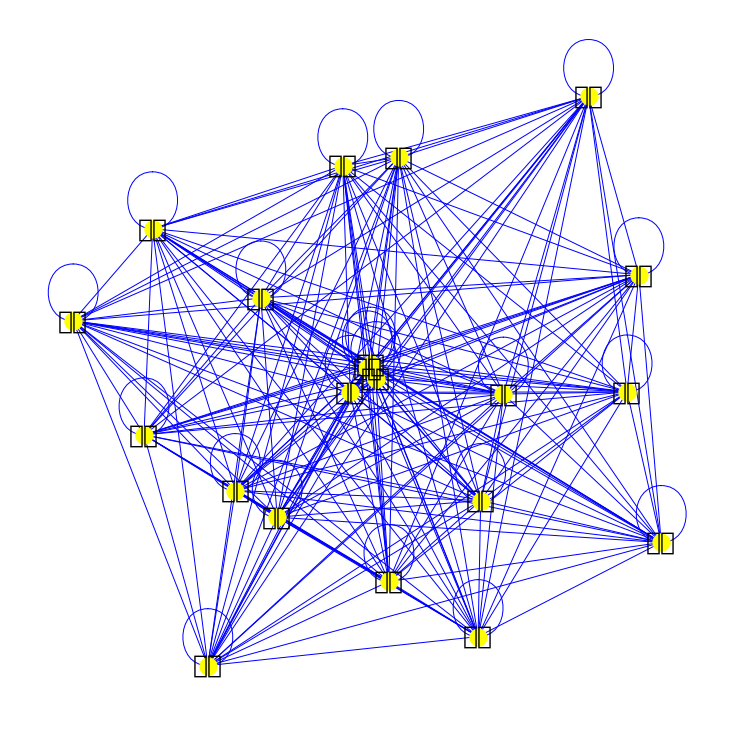

In [152]:
import networkx as nx

plt.figure(figsize = (10,10))
graph1 = nx.from_pandas_adjacency(coocc_test)
nx.draw(graph1, with_labels = True, node_color = 'yellow', font_size = 25, edge_color = 'blue')
plt.savefig('共現圖,jpg')

In [9]:
cheros_all = ""
for i in range(0,40):
    cheros_all = cheros_all + cheros["text"][i]
#cheros["text"][39]
len(cheros_all)

892527

In [10]:
text = cheros_all

jieba.set_dictionary(dictfile)
jieba.analyse.set_stop_words(stopfile)

tags = jieba.analyse.extract_tags(text, topK=200)

seg_list = jieba.lcut(text, cut_all=False)
dictionary = Counter(seg_list)

cheros_freq = {}
for ele in dictionary:
    if ele in tags:
        cheros_freq[ele] = dictionary[ele]
print(cheros_freq) # 計算出現的次數

Building prefix dict from /Users/anderson/Desktop/Data Science/dict.txt ...
Loading model from cache /var/folders/k_/2r9gfk5j0fbc0l7wptv_v2jc0000gn/T/jieba.ubf681b503bf534ef6debd423b5d835b5.cache
Loading model cost 1.292 seconds.
Prefix dict has been built successfully.


{'正是': 329, '一個': 996, '說話': 228, '左手': 346, '說道': 1044, '原來': 434, '剛才': 113, '過來': 197, '過去': 227, '當即': 208, '如何': 328, '喝道': 273, '兄弟': 291, '登時': 205, '不見': 171, '突然': 365, '眼見': 310, '一聲': 703, '可是': 294, '本來': 148, '見到': 265, '江南': 215, '當真': 189, '一陣': 326, '一隻': 128, '這位': 147, '楊鐵心': 249, '適才': 141, '二人': 311, '來到': 113, '兩位': 164, '這裏': 369, '下來': 225, '我們': 365, '不會': 171, '不是': 550, '問道': 273, '卻是': 376, '咱們': 691, '當年': 135, '雙手': 312, '地下': 357, '伸手': 259, '起來': 314, '的話': 138, '兩個': 272, '聽得': 117, '難道': 231, '還有': 128, '後來': 183, '這些': 182, '不能': 357, '心想': 526, '自己': 970, '這般': 211, '忽然': 285, '不過': 252, '回來': 126, '這個': 212, '出來': 441, '幾個': 128, '於是': 184, '聽到': 165, '之極': 157, '這時': 512, '手裏': 120, '怎樣': 176, '搖頭': 139, '不敢': 424, '這樣': 165, '這才': 155, '兩人': 687, '始終': 132, '心中': 774, '這是': 225, '此時': 229, '大聲': 138, '哪裏': 333, '一人': 211, '身上': 294, '功夫': 561, '不知': 617, '武功': 766, '如此': 390, '當下': 523, '之中': 456, '低聲': 198, '雖然': 309, '身子': 414, '一會': 153, '大叫': 1

In [84]:
lee_data = pd.DataFrame(lee_freq,index = [0]).T.reset_index()
lee_data.columns = ['word','lee_times']

lee_data_all = pd.merge(left=lee_data,right=dict_all_data,how="left",on='word', # 透過此欄位合併
                       ).sort_values(["lee_times"], ascending=False)
lee_data_all.head()

,word,lee_times,freq,cate
0,李尋歡,3106,2.0,nr
48,沒有,1519,87597.0,v
144,阿飛,1427,26.0,nr
51,知道,1035,42780.0,v
184,仙兒,861,3.0,n


<Figure size 1000x500 with 0 Axes>

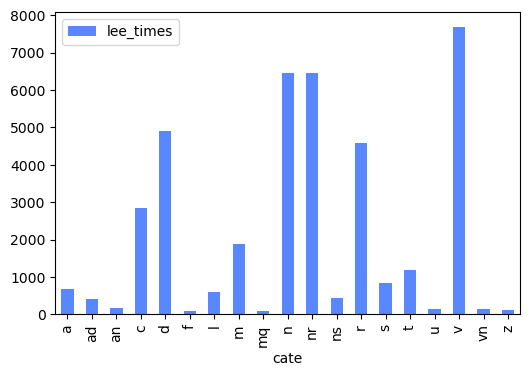

In [115]:
lee_freq = lee_data_all.groupby(['cate']).sum().reset_index()
#print(lee_freq)
# 圖片大小
plt.figure(figsize=(10, 5)) 
#圖片像素
plt.rcParams['savefig.dpi'] = 100 
#分辨
plt.rcParams['figure.dpi'] = 100
ax = lee_freq[['cate','lee_times']].plot(x='cate', kind='bar', color='#5887ff')

In [85]:
cheros_data = pd.DataFrame(cheros_freq,index = [0]).T.reset_index()
cheros_data.columns = ['word','cheros_times']
#cheros_words = cheros_data.sort_values(["cheros_times"], ascending=False)
cheros_data_all = pd.merge(left=cheros_data,right=dict_all_data,how="left",on='word', # 透過此欄位合併
                       ).sort_values(["cheros_times"], ascending=False)
cheros_data_all.head()

,word,cheros_times,freq,cate
126,郭靖,3373,2.0,nr
172,黃蓉,2500,3.0,nr
185,洪七公,1057,1129.0,nr
188,歐陽鋒,1049,1511.0,nr
4,說道,1044,21168.0,v


In [111]:
#cheros_freq = cheros_data_all.groupby(['cate']).sum().reset_index()

<Figure size 1000x500 with 0 Axes>

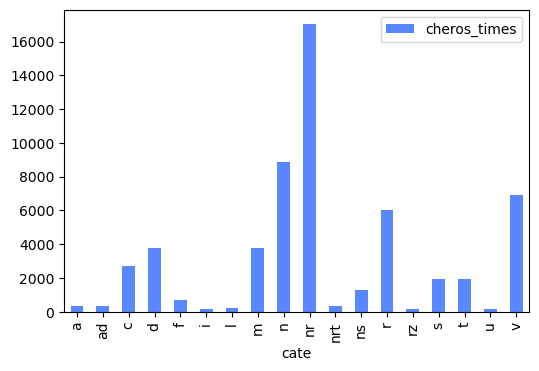

In [113]:
cheros_freq = cheros_data_all.groupby(['cate']).sum().reset_index()
#print(lee_freq)
# 圖片大小
plt.figure(figsize=(10, 5)) 
#圖片像素
plt.rcParams['savefig.dpi'] = 100 
#分辨
plt.rcParams['figure.dpi'] = 100
ax = cheros_freq[['cate','cheros_times']].plot(x='cate', kind='bar', color='#5887ff')

<Figure size 1000x500 with 0 Axes>

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 26446 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 23563 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 27489 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 27794 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 26377 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 38463 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 39131 missing from current font.

/opt/anaconda3/lib/p

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 26446 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 23563 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 27489 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 27794 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 26377 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 38463 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 39131 missing from current font.

/opt/anaconda3/lib/p

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 38283 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 22987 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 20043 missing from current font.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 21839 missing from current font.



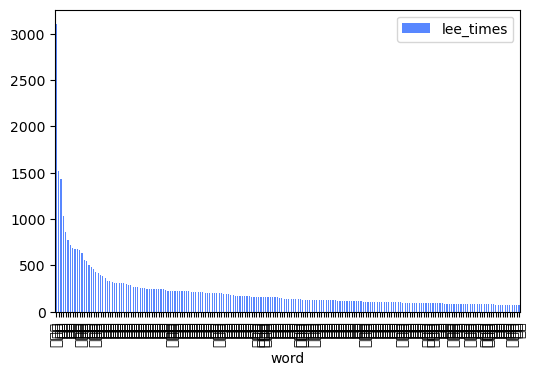

In [92]:
# 圖片大小
plt.figure(figsize=(10, 5)) 
#圖片像素
plt.rcParams['savefig.dpi'] = 100 
#分辨
plt.rcParams['figure.dpi'] = 100
# 抓取select_df的sports、nums欄位，並以sports當x軸，畫出一個bar，顏色為#5887ff
ax = lee_data_all[['word','lee_times']].plot(x='word', kind='bar', color='#5887ff')

In [ ]:
#暫時貼
flat = [x for sublist in subdata_seg_list for x in sublist]
diction = Counter(flat)

In [ ]:
#暫時貼
mask = np.array(Image.open("criminal.jpg"))
font = "C:\Windows\Fonts\MSJH.TTC"

In [ ]:
#暫時貼
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

In [ ]:
#暫時貼
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [74]:
print("test\ahaha")

testhaha
